### Black-Scholes-Merton Formula

The Black-Scholes-Merton formula for calculating the price of a European call or put option is:

$$
\begin{align*}
d_1 &= \frac{1}{\sigma \sqrt{t}} \left[ \ln\left(\frac{S_0}{X}\right) + \left(r + \frac{\sigma^2}{2}\right) t \right] \\
d_2 &= d_1 - \sigma \sqrt{t}
\end{align*}
$$

$$
\begin{align*}
C &= S_0 \cdot N(d_1) - X \cdot e^{-rt} \cdot N(d_2) \\
P &= X \cdot e^{-rt} \cdot N(-d_2) - S_0 \cdot N(-d_1)
\end{align*}
$$

Where:
- \( C \) = Price of a European call option
- \( P \) = Price of a European put option
- \( S_0 \) = Current price of the underlying asset
- \( X \) = Strike price of the option
- \( r \) = Risk-free interest rate
- \( t \) = Time to expiration
- \( N() \) = Cumulative distribution function of the standard normal distribution
- \( d_1 \) and \( d_2 \) are calculated as follows:




In [25]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
# S - stock price
# K - strike price
# r - risk-free rate
# stdev - standard deviation
# T - time horizon (years)

def d1(S, K, r, stdev, T):
    return (np.log(S/K) + (r + stdev ** 2 / 2) * T / (stdev * np.sqrt(T)))

def d2(S, K, r, stdev, T):
    return (np.log(S/K) + (r - stdev ** 2 / 2) * T / (stdev * np.sqrt(T)))

In [3]:
# Cumulative Distribution Function (cdf) : shows how the data accumulates in time:
norm.cdf(0)

0.5

In [4]:
norm.cdf(0.25)

0.5987063256829237

In [5]:
norm.cdf(0.75)

0.7733726476231317

In [6]:
norm.cdf(9)

1.0

$$
\begin{align*}
C &= S_0 \cdot N(d_1) - K \cdot e^{-rt} \cdot N(d_2) \\
\end{align*}
$$

In [7]:
#Black Sholes Formula
def BSM(S, K, r, stdev, T):
    return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T)))

In [8]:
data = pd.read_csv('PG_2007_2017.csv', index_col='Date')
data.head()

,PG
Date,
2007-01-03,46.849339
2007-01-04,46.493664
2007-01-05,46.094406
2007-01-08,46.196045
2007-01-09,46.079914


In [9]:
#Current Stock Price
S = data.iloc[-1]
S


PG    88.118629
Name: 2017-04-10, dtype: float64

In [11]:
#Log Returns:
log_returns = np.log(1 + data.pct_change())

#Std Dev:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176109
dtype: float64

In [12]:
#Risk free rate
r = 0.025
# Strike Price
K = 110.0
# Time Horizon (years)
T = 1

In [13]:
# d1
d1(S, K, r, stdev, T)

PG    0.008216
dtype: float64

In [14]:
# d2
d2(S, K, r, stdev, T)

PG   -0.167893
dtype: float64

In [15]:
# BSM
BSM(S, K, r, stdev, T)

PG   -2.141685
Name: 2017-04-10, dtype: float64

## Euler Discretization 


The Euler discretization method for a stochastic differential equation (SDE) is represented as:

$$
X_{t+\Delta t} = X_t + \mu(X_t, t) \cdot \Delta t + \sigma(X_t, t) \cdot \sqrt{\Delta t} \cdot Z
$$

Where:
- \( X_{t+\Delta t} \) is the value of the process at time \( t + \Delta t \)
- \( X_t \) is the value of the process at time \( t \)
- \( \mu(X_t, t) \) is the drift term of the process at time \( t \)
- \( \sigma(X_t, t) \) is the volatility term of the process at time \( t \)
- \( \Delta t \) is the time step or time increment
- \( Z \) is a random variable sampled from a standard normal distribution (\( N(0,1) \))


In [16]:
log_returns = np.log(1 + data.pct_change())
log_returns

,PG
Date,
2007-01-03,NaN
2007-01-04,-0.007621
2007-01-05,-0.008624
2007-01-08,0.002203
2007-01-09,-0.002517
...,...
2017-04-04,0.002562
2017-04-05,0.000667
2017-04-06,-0.006356


In [19]:
r = 0.025

stdev = log_returns.std() * 250 ** 0.5
stdev = stdev.values
stdev

array([0.17610875])

In [20]:
T = 1.0
t_intervals = 250
delta_T = T / t_intervals

iterations = 10000

In [21]:
Z =- np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

In [22]:
for t in range (1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r-0.5 * stdev ** 2) * delta_T + stdev * delta_T ** 0.5 * Z[t])

In [23]:
S

array([[ 88.118629  ,  88.118629  ,  88.118629  , ...,  88.118629  ,
         88.118629  ,  88.118629  ],
       [ 87.5691887 ,  86.95823957,  87.56366667, ...,  86.78867885,
         86.10605584,  88.11138535],
       [ 85.56454236,  86.50297946,  87.61060053, ...,  88.14666487,
         87.51287444,  86.93218511],
       ...,
       [102.72223405,  76.42462781,  61.83933948, ...,  95.31286718,
         78.40743786,  66.35249528],
       [101.97287238,  75.75009129,  62.30455336, ...,  94.85181142,
         79.01128563,  66.69431683],
       [103.31857312,  75.52122305,  61.1245228 , ...,  95.15108366,
         79.75421141,  65.20758651]])

In [24]:
S.shape

(251, 10000)

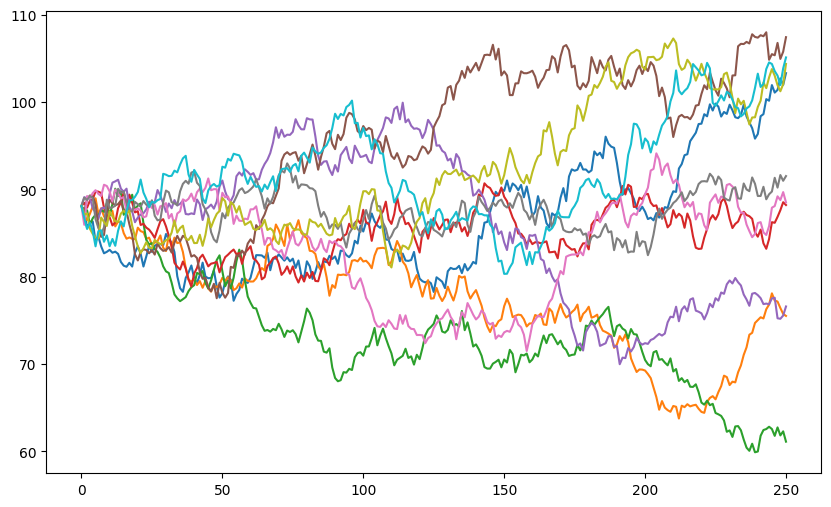

In [26]:
# Add index operator so that only first 10
plt.figure(figsize=(10,6))
plt.plot(S[:, :10])
 

# For Call Options:
    - Stock Price - Strike Price > 0 --> BUY
    - Stock Price - Strike Price < 0 --> DO NOT BUY

In [27]:
# numpy.maximum() --> creates an array of either 0s or the number equals to the differences
# pay-off
p = np.maximum(S[-1] - 110, 0)
p

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
p.shape

(10000,)

In [29]:
# Price of Call Option:
C = np.exp(-r * T) * np.sum(p) / iterations
C

1.1348908919101757